In [19]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
rideData = pd.read_csv(ride_data_to_load)
cityData = pd.read_csv(city_data_to_load)
# Combine the data into a single dataset
df = pd.merge(rideData, cityData, on='city')
# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [20]:
# DataFrame of types of cities
cType = df[['city', 'type']].drop_duplicates()
cType = cType.set_index('city')

In [21]:
# Basic calcs: Average Fare, # of rides, # of drivers, total fare, types of the cities 
cityGroup = pd.DataFrame(df.groupby(['city'])['fare'].mean())
cityGroup['rides'] = df.groupby('city')['ride_id'].count()
cityGroup['type'] = cType['type']
cityGroup['Total Fare'] = cityGroup['rides'] * cityGroup['fare']
cityGroup['drivers'] = df.groupby(['city'])['driver_count'].mean()
cityGroup.head()

,fare,rides,type,Total Fare,drivers
city,,,,,
Amandaburgh,24.641667,18,Urban,443.55,12
Barajasview,25.332273,22,Urban,557.31,26
Barronchester,36.422500,16,Suburban,582.76,11
Bethanyland,32.956111,18,Suburban,593.21,22
Bradshawfurt,40.064000,10,Rural,400.64,7


In [22]:
# seaparate DFs for different types
urban = cityGroup[cityGroup['type']== 'Urban']
suburban = cityGroup[cityGroup['type']== 'Suburban']
rural = cityGroup[cityGroup['type']== 'Rural']
urban.head()

,fare,rides,type,Total Fare,drivers
city,,,,,
Amandaburgh,24.641667,18,Urban,443.55,12
Barajasview,25.332273,22,Urban,557.31,26
Carriemouth,28.314444,27,Urban,764.49,52
Christopherfurt,24.501852,27,Urban,661.55,41
Deanville,25.842632,19,Urban,491.01,49


In [23]:
# grouping in a list for the iteratins
areas = [urban, suburban, rural]

## Bubble Plot of Ride Sharing Data

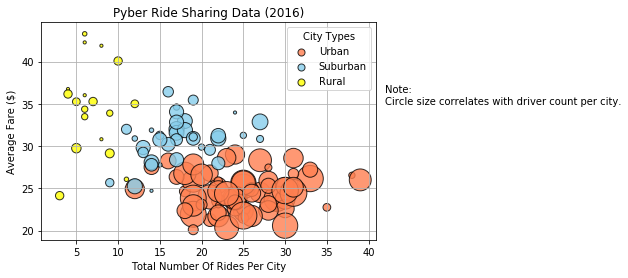

In [24]:
# Bubble Plot
fig, ax = plt.subplots(1)

colors = ['coral','skyblue','yellow']

# iterating through types(areas)
for i in range(len(areas)):
    areas[i].plot.scatter(ax = ax, x='rides',
                    y='fare', 
                    s=areas[i]['drivers'] * 10, 
                    c=colors[i], 
                    edgecolor='black', 
                    alpha=.8,
                    label=areas[i]['type'][0],
                    grid = True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number Of Rides Per City")    
plt.text(42, 35, 'Note:\nCircle size correlates with driver count per city.')
plt.title('Pyber Ride Sharing Data (2016)')

legend = plt.legend(title='City Types')
for dot in legend.legendHandles:
    dot._sizes = [50]

plt.savefig("Output/Pyber Ride Sharing Data Bubbles")

## Total Fares by City Type

Text(0.5, 1.0, '% of Total Fares by City Type')

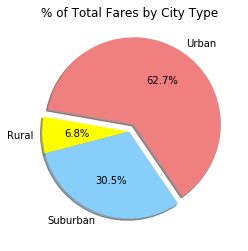

In [25]:
# Calculate Type Percents
cityTypeFare = pd.DataFrame(cityGroup.groupby('type')['Total Fare'].sum())
colors = ["yellow", "lightskyblue", "lightcoral", "lightskyblue"]
labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.1)
# Build Pie Chart
plt.pie(cityTypeFare, colors = colors, autopct="%1.1f%%", labels=labels, explode=explode, startangle=170, shadow = True)
plt.title("% of Total Fares by City Type")
# Save Figure


## Total Rides by City Type

Text(0.5, 1.0, '% of Total Rides Per City Type')

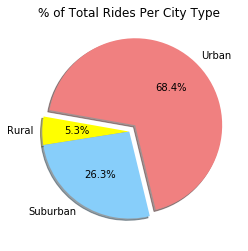

In [26]:
# Calculate Ride Percents
cityTypeRides = pd.DataFrame(cityGroup.groupby('type')['rides'].sum())
# Build Pie Chart
plt.pie(cityTypeRides, colors = colors, autopct="%1.1f%%", labels=labels, explode=explode, startangle=170, shadow = True)
plt.title("% of Total Rides Per City Type")
# Save Figure


## Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers Per City Type')

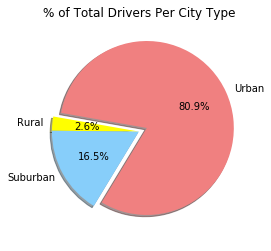

In [27]:
# Calculate Driver Percents
cityTypeDrivers = pd.DataFrame(cityGroup.groupby('type')['drivers'].sum())
# Build Pie Charts
plt.pie(cityTypeDrivers, colors = colors, autopct="%1.1f%%", labels=labels, explode=explode, startangle=170, shadow = True)
plt.title("% of Total Drivers Per City Type")
# Save Figure
